In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

data = load_iris()
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
X = data["data"].copy()[ :, 2:4]# 2 columns to allow straightforward decision boundary visualization
y = data["target"].copy()

stratSplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in stratSplit.split(X, y):
    X_train = X[train_index]
    X_test = X[test_index]
    
    y_train = y[train_index]
    y_test = y[test_index]

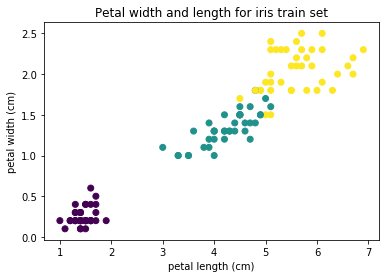

In [5]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.xlabel(data["feature_names"][2])
plt.ylabel(data["feature_names"][3])
plt.title("Petal width and length for iris train set")
plt.savefig("irisSimpleScatter.png", bbox_inches="tight")
plt.show()

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
export_graphviz(
            dt_clf,
            out_file="iris_tree.dot",
            feature_names=data.feature_names[2:],
            class_names=data.target_names,
            rounded=True,
            filled=True
        )

In [13]:
def plotDecisionBoundary(svc, X, y, X_train, y_train, title, savename):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    xx_r = xx.ravel()
    yy_r = yy.ravel()
    Z = svc.predict(np.c_[xx_r, yy_r])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
    plt.scatter(X[:, 0],X[:, 1],c=y, cmap=plt.cm.cool)
    plt.xlabel(data["feature_names"][2])
    plt.ylabel(data["feature_names"][3])
    plt.title(title)
    plt.savefig(savename,bbox_inches="tight")
    plt.show()

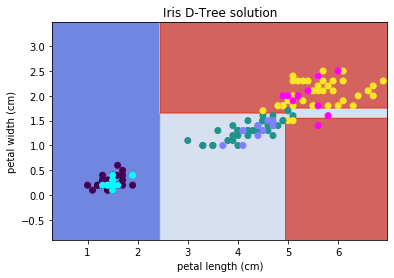

In [14]:
plotDecisionBoundary(dt_clf, X_test, y_test, X_train, 
                     y_train, title=f"Iris D-Tree solution",savename="irisDecisionTreeNoLimit.png")

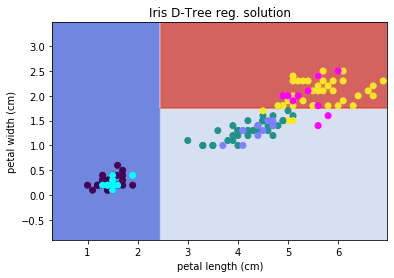

In [15]:
dt_clf_reg = DecisionTreeClassifier(max_depth=2)
dt_clf_reg.fit(X_train, y_train)
export_graphviz(
            dt_clf_reg,
            out_file="iris_tree_md2.dot",
            feature_names=data.feature_names[2:],
            class_names=data.target_names,
            rounded=True,
            filled=True
        )
plotDecisionBoundary(dt_clf_reg, X_test, y_test, X_train, 
                     y_train, title=f"Iris D-Tree reg. solution",savename="irisDecisionTreeMaxDepth2.png")